# **ESTADISTICA NO PARAMETRICA**

# **1. Prueba de Man Whitney**

U de Mann-Whitney o prueba de Wilcoxon-Mann-Whitney, es una prueba no paramétrica utilizada para comparar dos muestras independientes y determinar si provienen de la misma población o si tienen distribuciones diferentes.

Utilizada para comparar dos grupos independientes no parámetricos y si no tenemos certeza de la distribución de los datos.

Para palicar esta prueba los datos deben ordenarse de alguna manera, y deben haber variables ordinales o continuas.

Est útil para comparar la superposición entre dos grupoos es decir que tanta diferencias hay entre ambos.

- **U pequeño:** quiere decir mayor diferencia entre los dos grupos.
- **U grande:** menor diferencia entre los grupos.

## **Ejemplo No. 1**

- ### **Contexto:**
Utilizaremos un dataset que contiene la cantidad de tejido cancerigeno extraido mediante las pinzas de tipo **estandar** (Forceps=1) y de tipo **jumbo** (Forceps=2). Se requiere comprobar si exten diferencias significativas o no.

Tendremos una variable nombrada como **resección**, que en medicina quieres decir que es una intervención que suele realizarse mediante cirugía, que consiste en extirpar un tumor y casi siempre se aplica adicionamente radioterapia local luego, para asegurar que no quede ninguna célula tumoralen la zona.

La pinza **jumbo** tiene una cabeza más grande y supuestamente agarra más tejedio tumoral, y es el objeto del presente análisis de confrimar cual de las dos pinzas es más efectiva para extraer más tejido.

Para lo cuál se recopilo información para cada una de las pinzas cuanto tejido fue extraído en cada paciente y se categorizó el resultado en un esquema que nos dice:

- Si el tejido extraído es menor a 1 cm, entonces la variable resection = 1.
- Si el tejido extraído es entre 1 y 2 cm, variable resection = 2.
- Si el tejido extraído es entre 2 y 4 cm, variable resection = 3.
- Si el tejido extraído es mayor a 4 cm, variable resection = 4.

De acuerdo a lo anterior los valores de la variable resection son valores ordinales, que se prodrán ordenar de menor a mayor tejido extraído, por lo tanto utilizaremos pruebas no parametricas, porque los datos son independientes y tenemos una variable ordinal.






- ### **Objetivo:**
Comprobar si la pinza yumbo que es la más grande extraé más tejido que la estandar.

- ### **Importamos librerías**

In [1]:
import pandas as pd #Herramienta para la estructura y manipulación de datos
from scipy import stats # Extrae de la librería scipy la función stats para realizar análisis estadisticos
from scipy.stats import mannwhitneyu # importa la función Man Whitney para calcular el p-valor de los grupos

- ### **Cargamos dataset**

In [2]:
data = pd.read_csv('../data/forceps.csv')
data

,Forceps,Resection
0,2.0,2.0
1,1.0,2.0
2,2.0,3.0
3,1.0,1.0
4,1.0,2.0
5,1.0,3.0
6,2.0,3.0
7,2.0,3.0
8,1.0,2.0
9,1.0,1.0


- ### **Dividimos los grupos de cada pinza**

In [3]:
group1 = data[data.Forceps == 1.0] #Grupo1 será el de las pinzas tipo estándar
group2 = data[data.Forceps == 2.0] #Grupo2 será el de las pinzas tipo jumbo
group1.head()

,Forceps,Resection
1,1.0,2.0
3,1.0,1.0
4,1.0,2.0
5,1.0,3.0
8,1.0,2.0


- ### **Aplicamos la prueba Man Whitney**

Antes de aplicar la prueba correspondiente, es importante saber que tipo de alternativa se va a escoger:
- **Prueba de dos colas 'two-sided':** 
Se utiliza cuando se quiere determinar si hay una diferencia significativa entre las dos muestras en términos de su ubicación o posición, es decir, si se desea saber si hay una diferencia entre las medianas de las dos muestras. En este caso, la hipótesis nula (H0) sería que las dos muestras provienen de la misma población.

- **Prueba de una cola superior 'greater':** 
Se utiliza la prueba de una cola superior cuando se quiere determinar si una muestra tiene valores significativamente mayores que la otra muestra. Es decir, si se desea saber si una muestra tiene una mediana significativamente mayor que la otra muestra. La hipótesis nula (H0) sería que las dos muestras provienen de la misma población y la muestra 1 no tiene valores significativamente mayores que la muestra 2.

- **Prueba de una cola inferior 'less':** 
Se utiliza la prueba de una cola inferior cuando se quiere determinar si una muestra tiene valores significativamente menores que la otra muestra. Es decir, si se desea saber si una muestra tiene una mediana significativamente menor que la otra muestra. La hipótesis nula (H0) sería que las dos muestras provienen de la misma población y la muestra 1 no tiene valores significativamente menores que la muestra 2.

Para este caso no solo nos interesa saber si hay diferencias significativas entre las dos pinzas, sino que médicamente nos interesa es si la pinza Jumbo que es más grande realmente atrapa más tejido que la estandar.

In [4]:
stat, p = mannwhitneyu(group1.Resection, group2.Resection, alternative='less')
print('p-value: ', p)

p-value:  0.015539092029131481


- ### **Conclusión**

P-valor < 0.05, entonces hay una diferencia significativa en la cantidad de tejido cancerígeno que se elimina con cada una de la pinzas, por lo cual la de tipo 2 (Jumbo Forcep) es mejor que la tipo 1 (Estándar).

## **Ejemplo No. 2**

- ### **Contexto:**
Utilizaremos un dataset que contiene información de ventas de gerentes y vendedores, donde encontraremos que la variable dependiente es de tipo ratio, por ende, debemos realizar pruebas de normalidad antes de utilizar tests no paramétricos.

- ### **Objetivo:**
Identificar si hay diferencia significativa entre los sueldos del personal de ventas y el de los gerentes.

- ### **Importamos librerías:**

In [2]:
import pandas as pd #Para manipulación de datos
import matplotlib.pyplot as plt # Herramienta para graficar datos
import seaborn as sns # Herramienta para graficos avanzados de datos
from scipy import stats #Importar de librería scipy la función stats para análisis estadisticos.
from scipy.stats import mannwhitneyu #Importar la función Man Whitney para realizar el test.
from statsmodels.stats.diagnostic import normal_ad#Importar la función Anderson Darling para prueba de normalidad
from scipy.stats import shapiro #Importar la función shapirlo wilk para prueba de normalidad

- ### **Cargamos el dataset:**

In [6]:
data = pd.read_csv('../data/salaries.csv')
data

,Salary,Position
0,57727.0,2.0
1,39907.0,1.0
2,46659.0,2.0
3,40233.0,1.0
4,42198.0,1.0
5,69102.0,2.0
6,40324.0,1.0
7,74456.0,2.0
8,36792.0,1.0
9,41007.0,1.0


- ### **Separamos los grupos:**

In [7]:
group1 = data[data.Position == 1]
group2 = data[data.Position == 2]
group2


,Salary,Position
0,57727.0,2.0
2,46659.0,2.0
5,69102.0,2.0
7,74456.0,2.0
10,105679.0,2.0
11,85530.0,2.0
13,39672.0,2.0
14,69279.0,2.0
17,39197.0,2.0
18,52404.0,2.0


- ### **Calculamos residuos a cada grupo:**

In [8]:
mean1 = group1.Salary.mean()
mean2 = group2.Salary.mean()
res1 = group1.Salary - mean1
res2 = group2.Salary - mean2


- ### **Realizamos test de normalidad:**

------------------------Vendedores--------------------------- 

Usando test Andrerson-Darling para prueba de distribución normal
P_valor por debajo de 0.05, Significa que no es normal 0.044334003125444804
Los residuos no tienen distribución normal 

Usando test Shapiro Wilks para prueba de distribución normal
P_valor por debajo de 0.05, Significa que no es normal 0.04937705025076866
Los residuos no tienen distribución normal 



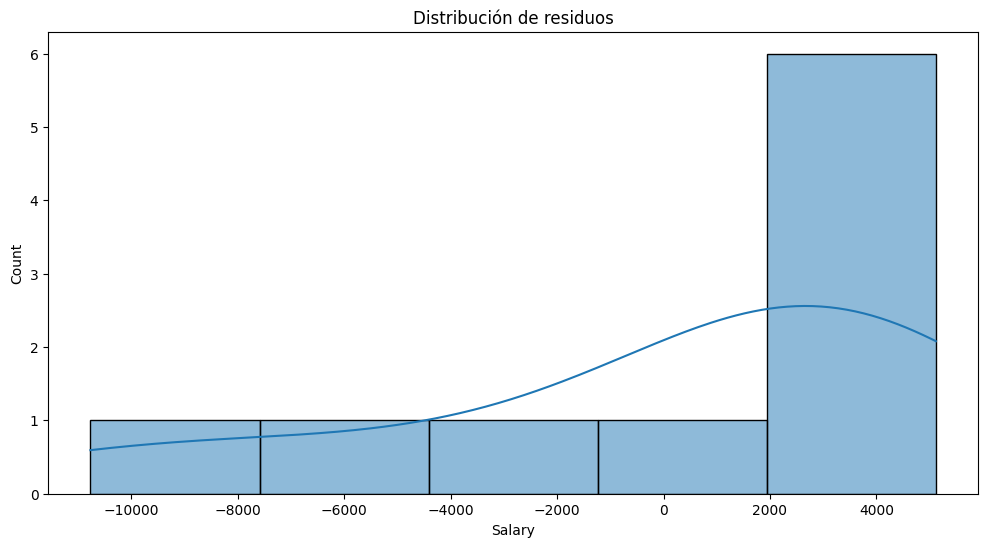


No se cumple la hipotesis nula

Es probable que los intervalos de confianza se vean afectados
Intente realizar transformaciones no lineales en las variables
------------------------Gerentes--------------------------- 

Usando test Andrerson-Darling para prueba de distribución normal
P_valor por debajo de 0.05, Significa que no es normal 0.6866418530842298
Los residuos estan distribuidos normalmente 

Usando test Shapiro Wilks para prueba de distribución normal
P_valor por debajo de 0.05, Significa que no es normal 0.5692880153656006
Los residuos estan distribuidos normalmente 



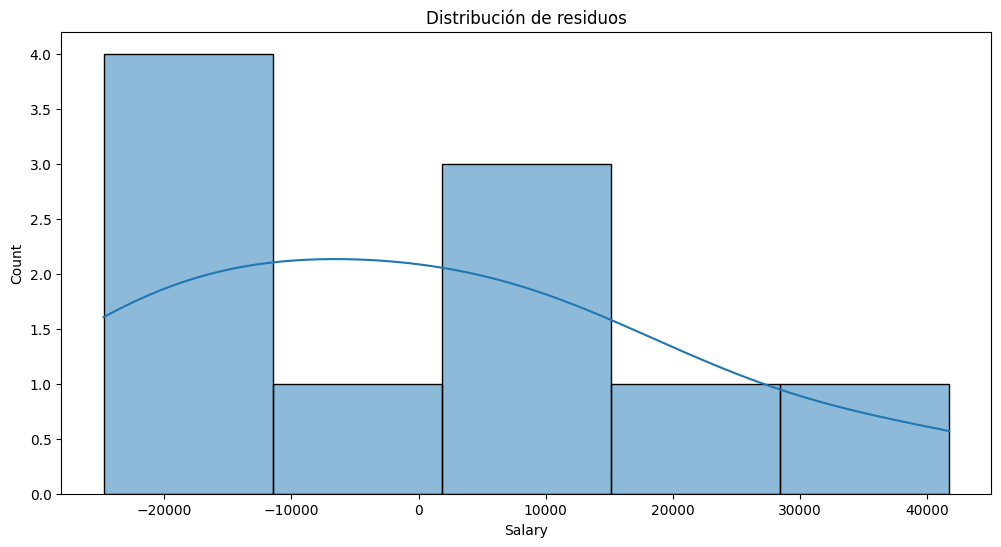


Se cumple la hipotesis nula


In [9]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
# Realizando test a los residuos
significancia = 0.05

print('------------------------Vendedores---------------------------','\n')
print('Usando test Andrerson-Darling para prueba de distribución normal')
p_valor = normal_ad(res1)[1]
print('P_valor por debajo de 0.05, Significa que no es normal', p_valor)

#Reporte de normalidad de los residuos
if p_valor < significancia:
    print('Los residuos no tienen distribución normal', '\n')
else:
    print('Los residuos estan distribuidos normalmente', '\n')

print('Usando test Shapiro Wilks para prueba de distribución normal')

p_valor_test_shapiro = shapiro(res1)
estat_shapiro_test = p_valor_test_shapiro[0]
p_valor_test_shapiro = p_valor_test_shapiro[1]
print('P_valor por debajo de 0.05, Significa que no es normal', p_valor_test_shapiro)


#Reporte de normalidad de los residuos
if p_valor_test_shapiro < significancia:
    print('Los residuos no tienen distribución normal', '\n')
else:
    print('Los residuos estan distribuidos normalmente', '\n')

#Graficando la distribución de los residuos
plt.figure(figsize=(12, 6))
plt.title('Distribución de residuos')
sns.histplot(res1, kde=True)
plt.show()

print()
if p_valor > significancia:
    print('Se cumple la hipotesis nula')
else:
    print('No se cumple la hipotesis nula')
    print()
    print('Es probable que los intervalos de confianza se vean afectados')
    print('Intente realizar transformaciones no lineales en las variables')

########################################################################################
#Realizando test  a los residuos

significancia2 = 0.05

print('------------------------Gerentes---------------------------','\n')
print('Usando test Andrerson-Darling para prueba de distribución normal')
p_valor2 = normal_ad(res2)[1]
print('P_valor por debajo de 0.05, Significa que no es normal', p_valor2)

#Reporte de normalidad de los residuos
if p_valor2 < significancia2:
    print('Los residuos no tienen distribución normal', '\n')
else:
    print('Los residuos estan distribuidos normalmente', '\n')

print('Usando test Shapiro Wilks para prueba de distribución normal')

p_valor_test_shapiro2 = shapiro(res2)
estat_shapiro_test2 = p_valor_test_shapiro2[0]
p_valor_test_shapiro2 = p_valor_test_shapiro2[1]
print('P_valor por debajo de 0.05, Significa que no es normal', p_valor_test_shapiro2)


#Reporte de normalidad de los residuos
if p_valor_test_shapiro2 < significancia2:
    print('Los residuos no tienen distribución normal', '\n')
else:
    print('Los residuos estan distribuidos normalmente', '\n')

#Graficando la distribución de los residuos
plt.figure(figsize=(12, 6))
plt.title('Distribución de residuos')
sns.histplot(res2, kde=True)
plt.show()


print()
if p_valor2 > significancia2:
    print('Se cumple la hipotesis nula')
else:
    print('No se cumple la hipotesis nula')
    print()
    print('Es probable que los intervalos de confianza se vean afectados')
    print('Intente realizar transformaciones no lineales en las variables')

warnings.filterwarnings("ignore", category=DeprecationWarning)


Debido a que no se cumple la distribución normal para ambos grupos, no es posible realizar pruebas parametricas sobre los datos.

- ### **Aplicamos la prueba Man Whitney**

In [10]:
stat, p = mannwhitneyu(group1.Salary, group2.Salary, alternative='less')
print('p-value: ', p)

p-value:  0.0014136360455584039


- ### **Conclusión**

P-valor < 0.05, entonces hay una diferencia significativa entre los sueldos del personal de ventas y el de los gerentes, todavez que los sueldos de los gerentes tienen un sueldo significativamente mayor que el de personal de ventas.

# **2. Prueba de Kruskal - Wallis 'K'**

La prueba de Kruskal-Wallis es una prueba no paramétrica utilizada para comparar tres o más grupos independientes y se utiliza cuando los datos no cumplen con los supuestos de normalidad o cuando se trabaja con variables ordinales.

## **Ejemplo No. 1**

- ### **Contexto:**
Los datos objetos de la siguiente prueba corresponden a un estudio de medicamentos en el que comparamos las clasificaciones de dolor en cuatro grupos de dosificación diferentes:

- Valor 1: 100 mg
- Valor 2: 250 mg
- Valor 3: 500 mg
- Valor 4: 1000 mg

A los 38 participantes de este estudio se le administra el medicamento en alguna de esas cantidades y luego se pide que clasifique su dolor en una escala del uno al siete, donde 1 es poco dolor y 7 es mucho dolor.

- ### **Objetivo:**
Confirmar si existe diferencia significativa de dolor reportado entre los grupos de dosis de medicamentos e identificar entre cuales grupos se encuentran las diferencias 


- ### **Importamos librerías:** 

In [3]:
import numpy as np
from scipy.stats import kruskal

- ### **Cargamos el dataset:**

In [7]:
data = pd.read_csv('..//data/drugstudy.csv')
data

,dose,rating
0,1.0,6.0
1,1.0,4.0
2,1.0,6.0
3,1.0,5.0
4,1.0,4.0
5,1.0,3.0
6,1.0,7.0
7,1.0,7.0
8,1.0,6.0
9,1.0,4.0


- ### **Separamos los grupos:**

In [8]:
grupo1 = data[data.dose == 1.0]['rating'].values
grupo2 = data[data.dose == 2.0]['rating'].values
grupo3 = data[data.dose == 3.0]['rating'].values
grupo4 = data[data.dose == 4.0]['rating'].values
grupo4


array([2., 3., 1., 3., 3., 2., 4., 1.])

- ### **Comparamos los 4 grupos con la prueba de Kruskal Wallis:**

In [10]:
stat, p = kruskal(grupo1, grupo2, grupo3, grupo4)
print('Estadistico=%.3f, p=%.3f' % (stat, p))

#Interpretación
alpha = 0.05
if p > alpha:
    print('No rechazamos H0: No hay diferencias significativas entre los grupos.')
else:
    print('Rechazamos H0: hay diferencias significativas entre los grupos.')


Estadistico=19.404, p=0.000
Rechazamos H0: hay diferencias significativas entre los grupos.


- ### **Comparamos los pares grupos con la pruewba Mann Whitney:**
Debido a que la prueba Kruskal - Wallis me informa si hay diferencia en al menos dos o más grupos, y no detalla especificamente en que grupos se encuentra la diferencia, se deben realizar pruebas Mann Whitney entre pares de grupos para encontrar exactamente donde está la diferencia.

Lo que esperamos que pase es que mientras más alta sea la dosis, menor dolor tendrá el paciente, así por ejemplo muy probablemente el grupo 4 (que tiene la mayor dosis) tendrá en la variable 'rating' valores más pequeños porque los pacientes posiblemente reportarán menor dolor al haber recibido mayor dosis del medicamento. Pero en las diferentes combinaciones entre estos 4 grupos (6 combinaciones) no sabemos muy bien lo que puede pasar, entonces lo que vamos a investigar es si hay diferencia significativa sin importar si se reporta menor o mayor dolor, es decir, que pondremos como hipotesis alternativa "two-sided" que significa que estamos considerando ambas posibilidades pero que al fin y al cabo el que se cumpla cualquiera de ellas quiere decir que hay diferencia significativa, que es lo que nos interesa saber.

In [4]:
#Bonferroni
alpha_nuevo = 0.05 / 6
alpha_nuevo

0.008333333333333333

In [12]:
stat, p = mannwhitneyu(grupo1, grupo2, alternative = 'two-sided')
print('P_valor: ', p)


if p > alpha_nuevo:
    print('No rechzamos H0: No hay diferencia significativa entre los grupos 1 y 2')
else:
    print('Rechzamos H0: hay diferencia significativa entre los grupos 1 y 2')


P_valor:  0.009911377465815045
No rechzamos H0: No hay diferencia significativa entre los grupos 1 y 2


In [13]:
stat, p = mannwhitneyu(grupo1, grupo3, alternative = 'two-sided')
print('P_valor: ', p)


if p > alpha_nuevo:
    print('No rechzamos H0: No hay diferencia significativa entre los grupos 1 y 3')
else:
    print('Rechzamos H0: hay diferencia significativa entre los grupos 1 y 3')

P_valor:  0.00039457325940790667
Rechzamos H0: hay diferencia significativa entre los grupos 1 y 3


In [14]:
stat, p = mannwhitneyu(grupo1, grupo4, alternative = 'two-sided')
print('P_valor: ', p)


if p > alpha_nuevo:
    print('No rechzamos H0: No hay diferencia significativa entre los grupos 1 y 4')
else:
    print('Rechzamos H0: hay diferencia significativa entre los grupos 1 y 4')

P_valor:  0.0010607936166658369
Rechzamos H0: hay diferencia significativa entre los grupos 1 y 4


In [15]:
stat, p = mannwhitneyu(grupo2, grupo3, alternative = 'two-sided')
print('P_valor: ', p)


if p > alpha_nuevo:
    print('No rechzamos H0: No hay diferencia significativa entre los grupos 2 y 3')
else:
    print('Rechzamos H0: hay diferencia significativa entre los grupos 2 y 3')

P_valor:  0.07441228142144751
No rechzamos H0: No hay diferencia significativa entre los grupos 2 y 3


In [16]:
stat, p = mannwhitneyu(grupo2, grupo4, alternative = 'two-sided')
print('P_valor: ', p)


if p > alpha_nuevo:
    print('No rechzamos H0: No hay diferencia significativa entre los grupos 2 y 4')
else:
    print('Rechzamos H0: hay diferencia significativa entre los grupos 2 y 4')

P_valor:  0.09993509549720665
No rechzamos H0: No hay diferencia significativa entre los grupos 2 y 4


In [17]:
stat, p = mannwhitneyu(grupo3, grupo4, alternative = 'two-sided')
print('P_valor: ', p)


if p > alpha_nuevo:
    print('No rechzamos H0: No hay diferencia significativa entre los grupos 3 y 4')
else:
    print('Rechzamos H0: hay diferencia significativa entre los grupos 3 y 4')

P_valor:  1.0
No rechzamos H0: No hay diferencia significativa entre los grupos 3 y 4


- ### **Conclusión:**
Según la prueba de Kruskal Wallis de comparación de grupos independientes existen diferencias significativas entre los valores reportados de dolor de acuerdo a la dosis recibida del medicamento.

Según las pruebas de Man Whitney de pares de grupos hay diferencias significativas entre los grupos:
- 1 y 3 (100mg vs 500mg)
- 1 y 4 (100mg vs 1000mg)

El dolor reportado por los pacientes no difiere significativamente entre los grupos que tomaron dosis de 250mg, 500mg y 1000mg

# **3. Prueba Wilcoxon**
Es una prueba no parámetrica utilizada en estadística para comparar dos muestras relacionadas, repetidas o pareadas:
- **Relacionadas**: No se consideran independientes porque los grupos comparten una característica en común.
- **Repetidas**: información de las mismas personas o grupos en diferentes momentos o situaciones para observar cómo cambian o evolucionan con el tiempo o bajo distintas condiciones.
- **Pareadas**: Cuando se recopila la misma medición de las mismas personas en más de una ocasión, para verificar su evolución o comportamiento.

Esta prueba se utiliza cuando:
- Los datos no cumplen los supuestos de normalidad para realizar una prueba parámetrica como la prueba t-student.

- Para determinar si existe diferencias entre las muestras.

- Cuando la prueba Man-Whitney no se puede utilizar.

## **Ejemplo No. 1**

- ### **Contexto:**
Trabajaremos un dataset que contiene datos de ingresos para Tiendas Minoristas para el primer y segundo trimestre. La consideramos una prueba pareada porque es la misma tienda en dos trimestre diferentes y necesitamos verificar su evolución.

- ### **Objetivo:**
Evidenciar si los ingresos del segundo trimestre comparados con el primero tienen diferencias significativas.

- ### **Importamos librerías:**

In [19]:
import numpy as np #Proporciona funciones y herramientas para trabajar con matrices
import pandas as pd #Permite manipular y analizar estructura de datos
import matplotlib.pyplot as plt #Permite crear graficos y visualizaciones
import seaborn as sns #Ofrece graficos y visualizaciones adicionales
from scipy import stats #Proporciona herramientas para crear calculos cientificos y estadisticos
from scipy.stats import wilcoxon # Permite realizar la prueba no paramétrica
from statsmodels.stats.anova import AnovaRM # Permite importar la clase AnovaRM para realizar analisis de varianzas.

- ### **Cargamos Datasets:**

In [4]:
data = pd.read_csv('..//data//revenuedata.csv')
data

,Q1,Q2
0,528819.0,329778.0
1,1263689.0,504738.0
2,1172512.0,989454.0
3,1647341.0,1465183.0
4,528419.0,351158.0
5,505763.0,342215.0
6,437477.0,283875.0
7,452378.0,308403.0
8,764158.0,629594.0
9,1792376.0,1707832.0


- ### **Comparamos las muestras:**

In [18]:
stat, p = wilcoxon(data.Q1, data.Q2, alternative='two-sided')
print('Estadistico=%.3f, p=%.3f' % (stat, p))

#Interpretación
alfa = 0.05

if alfa > 0.05:
  print('No rechazamos H0: No hay diferencias significativas entre las muestras')
else:
  print('Rechazamos H0: hay diferencias significativas entre las muestras')

Estadistico=32.000, p=0.018
Rechazamos H0: hay diferencias significativas entre las muestras


- ### **Media de ingresos por trimestre:**

In [20]:
print(data.Q1.mean(), data.Q2.mean())

941415.1666666666 788682.7777777778


Evidentemente observamos según la media de ingresos por trimestre, que fue mayor el ingresos del primero comparado con el segundo.

In [21]:
stat, p = wilcoxon(data.Q1, data.Q2, alternative='greater')
print('Estadistico=%.3f, p=%.3f' % (stat, p))

#Interpretación
alfa = 0.05

if alfa > 0.05:
  print('No rechazamos H0: No hay diferencias significativas entre las muestras')
else:
  print('Rechazamos H0: hay diferencias significativas entre las muestras')

Estadistico=139.000, p=0.009
Rechazamos H0: hay diferencias significativas entre las muestras


- ### **Conclusión:**
Podemos concluir que lo ingresos disminuyen significativamente del primer trimestre al segundo trimestre.

# **4. Prueba Friedman**

- Permite comparar tres o más muestras repetidas (recordemos que las muestras repetidas son cuando se miden caracteristicas o resultados sobre el mismo grupo de estudio).
- Es el equivalente al one-way ANOVA para medidas repetidas
- Es una extensión de rangos con signos del la prueba Wilcoxon
- Se utiliza para vairable ordinales y/o cuando no se cumple la normalidad de los datos

- ## **Ejemplo No. 1**

- ### **Contexto:**
Trabajaremos con un dataset que contiene información sobre la calificación de 10 jueces en la cata de seis tipos de vinos; la calificación esta comprendida entre 1 y 7, siendo 1 la peor calificación y 7 la mejor calificación.

- ### **Objetivo:**
Identificar en que grupos se tienen diferencias significativas según las calificaciones realizada por los jueces.

- ### **Importamos librerías:**

In [24]:
import numpy as np #Proporciona funciones y herramientas para trabajar con matrices
import pandas as pd #Permite manipular y analizar estructura de datos
import matplotlib.pyplot as plt #Permite crear graficos y visualizaciones
import seaborn as sns #Ofrece graficos y visualizaciones adicionales
from scipy import stats #Proporciona herramientas para crear calculos cientificos y estadisticos
from scipy.stats import wilcoxon # Permite realizar la prueba no paramétrica Wilcoxon
from scipy.stats import friedmanchisquare # Permite realizar la prueba no paramétrica Friedman
import warnings #Permite controlar advertencias
warnings.filterwarnings ("ignore") #Ocultan las advertencias
from itertools import combinations #Herramienta util para generar todas las combinaciones en un elemento


- ### **Cargamos dataset:**

In [25]:
data = pd.read_csv('../data//wine.csv')
data

,Judge,pinecreek,saintjude,northnapa,sevenwinds,eternalvalley
0,1.0,6.0,3.0,3.0,5.0,3.0
1,2.0,7.0,4.0,4.0,4.0,4.0
2,3.0,6.0,5.0,4.0,5.0,3.0
3,4.0,7.0,3.0,2.0,4.0,2.0
4,5.0,5.0,4.0,3.0,4.0,4.0
5,6.0,6.0,3.0,3.0,3.0,2.0
6,7.0,7.0,4.0,2.0,5.0,3.0
7,8.0,6.0,3.0,4.0,5.0,3.0
8,9.0,7.0,3.0,3.0,3.0,4.0
9,10.0,5.0,4.0,2.0,4.0,2.0


- ### **Realizamos prueba Friedman:**

In [26]:
stat, p = friedmanchisquare(data.pinecreek, data.saintjude, data.northnapa, data.sevenwinds, data.eternalvalley) #Por defecto la alternative esta 'two-sided'
print('Estadistico = %.3f, p=%.3f' % (stat, p))
alfa = 0.05

if p > alfa:
  print('No rechazamos H0:  No hay diferencias significativas entre los grupos.')
else:
  print('Rechazamos H0:  Hay diferencias significativas entre los grupos.')

Estadistico = 29.893, p=0.000
Rechazamos H0:  Hay diferencias significativas entre los grupos.


- ### **Identificamos dónde estan las diferencias:**

In [27]:
#Identificamos la cantidad de grupos
num_grupos = len(data.columns) - 1

combinaciones = list(combinations(range(num_grupos), 2))
num_combinaciones = len(combinaciones)

print(f"El número de combinaciones de dos elementos en {num_grupos} grupos es: {num_combinaciones}")

#Aplicamos la corrección de Bonferroni

bonferroni = 0.05 / num_grupos

#definimos una función que me devuelva el resultado de la prueba

def testWilcoxon (x,y):
  stat, p = wilcoxon (x, y, alternative='two-sided')
  print('Estadistico = %.3f, p = %.3f' % (stat, p) )

  alfa = 0.05

  if p > alfa:
    print ('No rechazamos H0: No hay diferencias significativas')
  else:
    print ('Rechazamos H0: Hay diferencias significativas')

El número de combinaciones de dos elementos en 5 grupos es: 10


In [28]:
grupos = ['pinecreek', 'saintjude', 'northnapa', 'sevenwinds', 'eternalvalley']

combinaciones = list(combinations(grupos, 2))

for combinacion in combinaciones:
  print(combinacion)


('pinecreek', 'saintjude')
('pinecreek', 'northnapa')
('pinecreek', 'sevenwinds')
('pinecreek', 'eternalvalley')
('saintjude', 'northnapa')
('saintjude', 'sevenwinds')
('saintjude', 'eternalvalley')
('northnapa', 'sevenwinds')
('northnapa', 'eternalvalley')
('sevenwinds', 'eternalvalley')


In [29]:
testWilcoxon(data.pinecreek, data.saintjude)

Estadistico = 0.000, p = 0.002
Rechazamos H0: Hay diferencias significativas


In [30]:
testWilcoxon(data.pinecreek, data.northnapa)

Estadistico = 0.000, p = 0.002
Rechazamos H0: Hay diferencias significativas


In [31]:
testWilcoxon(data.pinecreek, data.sevenwinds)

Estadistico = 0.000, p = 0.002
Rechazamos H0: Hay diferencias significativas


In [32]:
testWilcoxon(data.pinecreek, data.eternalvalley)

Estadistico = 0.000, p = 0.002
Rechazamos H0: Hay diferencias significativas


In [33]:
testWilcoxon(data.saintjude, data.northnapa)

Estadistico = 2.500, p = 0.084
No rechazamos H0: No hay diferencias significativas


In [34]:
testWilcoxon(data.saintjude, data.sevenwinds)

Estadistico = 0.000, p = 0.063
No rechazamos H0: No hay diferencias significativas


In [35]:
testWilcoxon(data.saintjude, data.eternalvalley)

Estadistico = 2.500, p = 0.084
No rechazamos H0: No hay diferencias significativas


In [36]:
testWilcoxon(data.northnapa, data.sevenwinds)

Estadistico = 0.000, p = 0.016
Rechazamos H0: Hay diferencias significativas


In [37]:
testWilcoxon(data.saintjude, data.eternalvalley)

Estadistico = 2.500, p = 0.084
No rechazamos H0: No hay diferencias significativas


In [38]:
testWilcoxon(data.sevenwinds, data.eternalvalley)

Estadistico = 1.500, p = 0.016
Rechazamos H0: Hay diferencias significativas


- ### **Conclusión:**
Hay diferencias significativas siempre que comparamos la calificación del vino pinecreek con los demás tipos de vinos, ya que obtiene calificaciones significativamente diferentes.

# **5. Correlación de Spearman**

- También se le conoce como coeficiente de correlación de rangos
-  Equivalente no paramétrico al coeficiente de correlación de Pearson
- Permite variables de tipo intervalo o ratio, pero también ordinales
- Toma valores entre -1 y 1.
- A diferencia de la correlación de Pearson que haya la relación lineales entre dos variables mientras que la correlación de rango de Spearman el valor que obtenemos describe el grado en que dos variables muestran una relación monótona (no son relaciones necesariamente lineales). No monótona cuando para el eje x hay más de un mismo punto del eje y.
- Mide que tan fuerte es la relación monótona entre las dos variables.
- No es tan sensible a los valores atípicos como o es la de Pearson


- ## **Ejemplo No. 1**

- ### **Contexto:**
En este ejemplo calcularemos el coeficiente de correlación de Spearman, con unos datos que contienen las puntuaciones o notas obtenidas en unas pruebas de aptitud que se le realizan a unos empleados 6 meses después de su contratación. Donde la variable score será la nota del examen y Rating la nota dada por el supervisor donde se calificará de 1 a 5 siendo 1 la nota más baja y 5 la más alta.


- ### **Objetivo:**
Determinar si hay una relación entre las notas obtenidas en el examen y las calificaciones dadas por los supervisores.

- ### **Importamos librerías:**

In [40]:
import pandas as pd #Permite manipular y analizar estructura de datos
from scipy import stats #Proporciona herramientas para crear calculos cientificos y estadisticos

- ### **Cargamos dataset:**

In [41]:
data = pd.read_csv('..//data/employeeratings.csv')
data

,Score,Rating
0,74.0,1.0
1,75.0,3.0
2,78.0,2.0
3,79.0,3.0
4,73.0,1.0
5,75.0,2.0
6,72.0,3.0
7,81.0,3.0
8,73.0,4.0
9,84.0,4.0


Teniendo en cuenta que una de las dos variables tiene valores ordinales se debe aplicar la prueba de correlación de Spearman.

- ### **Calculamos coeficiente de correlación:**


In [42]:
corr, p = stats.spearmanr(data.Score, data.Rating)
print('Correlación = %.3f, p = %.3f' % (corr, p))

alfa = 0.05

if p > alfa:
  print('No rechazamos H0: Correlación no significativa')
else:
  print('Rechazamos H0: Correlación significativa')

Correlación = 0.763, p = 0.000
Rechazamos H0: Correlación significativa


### **Conclución:**
Con el resultado de correlación fuerte podemos concluir que las calificaciones más altas en las pruebas de aptitud se asocian con las calificaciones más altas de los supervisores. Esto quiere decir que generalmente los colaboradores que obtienen mayor nota en el examen de aptitud tienen una calificación más alta por sus supervisores.

- ## **Ejemplo No. 2**

- ### **Contexto:**
El conjunto de datos a trabajar contiene información sobre la densidad en la presencia de escarabajos y las poblaciones de pinos un bosque. La variable pine:population contiene las cantidades de pino durante un año en un bosque especifico, es decir cada fila es un año diferente y la variable beetle_density es la densidad de un escarabajo en específico que esta presente en el bosque.

- ### **Objetivo:**
Determinar si realmente los escarabajos estan siendo beneficiosos para la población de pinos, debido a que se sospecha que si pero queremos respaldarlo estadisticamente.

- ### **Importamos librerías:**

In [43]:
import pandas as pd #Permite manipular y analizar estructura de datos
import matplotlib.pyplot as plt #Permite crear graficos y visualizaciones
import seaborn as sns #Ofrece graficos y visualizaciones adicionales
from scipy import stats #Proporciona herramientas para crear calculos cientificos y estadisticos
from sklearn.linear_model import LinearRegression #para implementar una regresión lineal
from statsmodels.stats.diagnostic import normal_ad #Permite realizar el test de normalidad Anderson Darling
from scipy.stats import shapiro #Permite realizar el test de normalidad Shapiro Wilks
import statsmodels.formula.api as smf #permite especificar modelos estadísticos de una manera más legible y concisa
import statsmodels.api as sm #se utiliza para realizar análisis estadísticos y modelado, incluyendo regresión, series temporales, análisis de supervivencia, análisis de varianza y más.

- ### **Cargamos dataset:**

In [44]:
data = pd.read_csv('..//data/pinetree.csv')
data

,pine_population,beetle_density
0,896.106591,0.090259
1,884.237630,0.223759
2,830.827303,0.311749
3,860.499707,0.796264
4,961.385880,0.543835
5,830.827303,0.531847
6,842.696265,0.497943
7,991.058283,0.770030
8,973.254841,0.627231
9,842.696265,0.300029


- ### **Prueba de normalidad en los datos:**
Debido a que las variables son de tipo ratio, debemos realizar una prueba de normalidad de los datos; si se cumple el supuesto de normalidad se aplicaran pruebas paramétricas como el coeficiente de Pearson de lo contrario se deben aplicar pruebas no parámetricas (Coeficiente de Spearman).

In [45]:
regresion = smf.ols('pine_population ~ beetle_density', data=data) #Metodo de regresión lineal
print(dir(regresion))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_kwargs', '_data_attr', '_df_model', '_df_resid', '_fit_collinear', '_fit_ridge', '_fit_zeros', '_formula_max_endog', '_get_init_kwds', '_handle_data', '_init_keys', '_kwargs_allowed', '_setup_score_hess', '_sqrt_lasso', 'data', 'df_model', 'df_resid', 'endog', 'endog_names', 'exog', 'exog_names', 'fit', 'fit_regularized', 'formula', 'from_formula', 'get_distribution', 'hessian', 'hessian_factor', 'information', 'initialize', 'k_constant', 'loglike', 'nobs', 'pinv_wexog', 'predict', 'rank', 'score', 'weights', 'wendog', 'wexog', 'whiten']


In [46]:
res = regresion.fit() #ajuste al modelo

<function matplotlib.pyplot.show(close=None, block=None)>

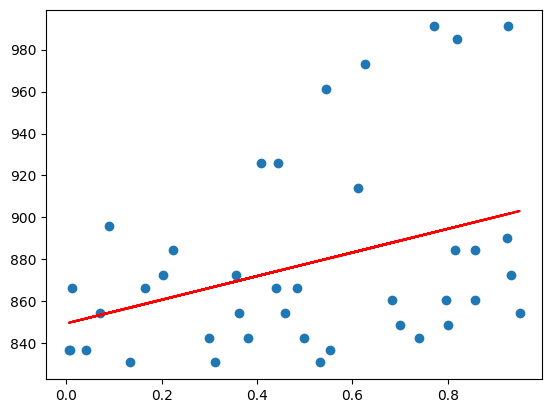

In [47]:
plt.scatter(data.beetle_density, data.pine_population)
plt.plot(data.beetle_density, res.fittedvalues, color = 'red')
plt.show

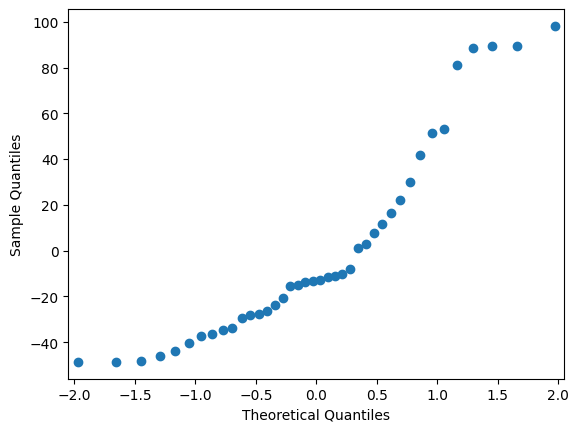

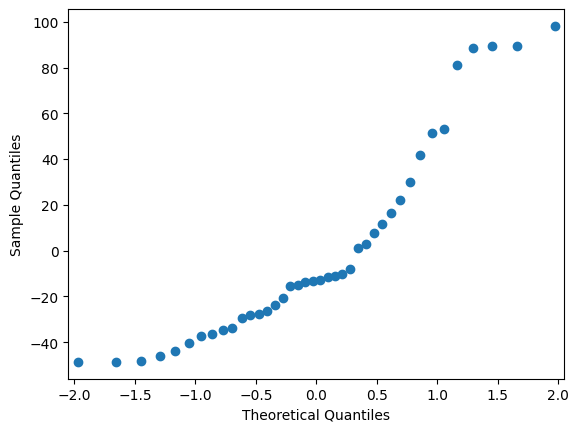

In [48]:
sm.qqplot(res.resid) #Verificamos si la distribución de los residuos sigue una linea recta, para comprobar si tiene una distribución normal

Supocisión: Los terminos de error tienen distribución normal

Utilizamos el test Anderson Darling para comprobar distribución normal
p_valor del test por debajo del 0.05 generalmente significa que no hay normalidad:  7.951116410427978e-05
Los residuos no tienen una distribución normal

Utilizamos el test Shapiro Wilks para comprobar distribución normal
p_valor del test por debajo del 0.05 generalmente significa que no hay normalidad:  0.00022803871252108365
Los residuos no tienen una distribución normal



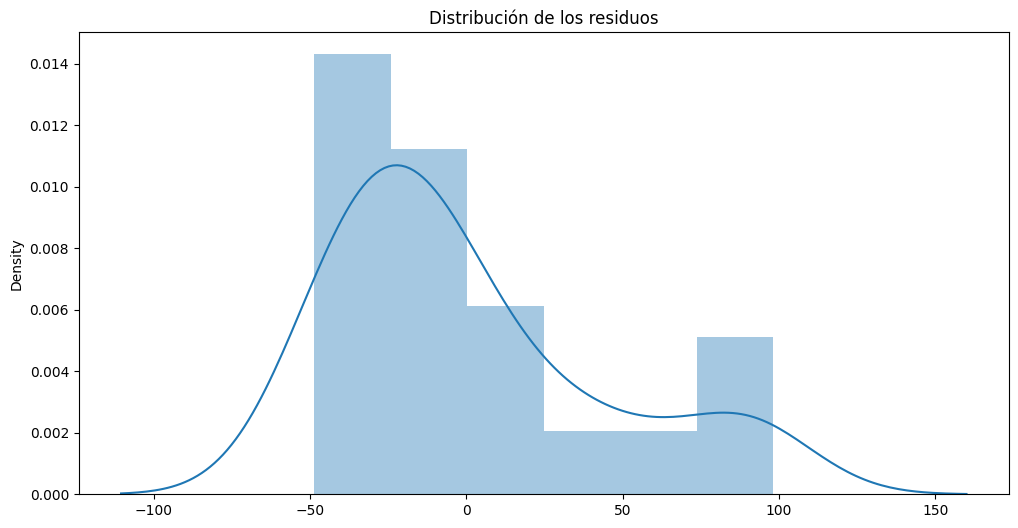


Suposición incorrecta

Los intervalos de confianza probablemente se verán afectados
Intente realizar transformaciones no lineales en variables


In [49]:
shapiro,
#Comprobamos si estadisticamente los datos tienen uns distribución normal

print('Supocisión: Los terminos de error tienen distribución normal' '\n' )

significancia = 0.05

print('Utilizamos el test Anderson Darling para comprobar distribución normal')

#Ingresamos los residuos al test
p_valor = normal_ad(res.resid)[1]
print('p_valor del test por debajo del 0.05 generalmente significa que no hay normalidad: ', p_valor)

#Reportando la normalidad de los residuos
if p_valor < significancia:
  print('Los residuos no tienen una distribución normal' '\n')
else:
  print('Los residuos siguen una distribución normal''\n')

print('Utilizamos el test Shapiro Wilks para comprobar distribución normal')

shapiro_test = shapiro(res.resid)
estadistico_shapiro_test = shapiro_test[0]
pvalor_shapiro_test = shapiro_test[1]
print('p_valor del test por debajo del 0.05 generalmente significa que no hay normalidad: ', pvalor_shapiro_test)

#Reportando la normalidad de los residuos
if pvalor_shapiro_test < significancia:
  print('Los residuos no tienen una distribución normal' '\n')
else:
  print('Los residuos siguen una distribución normal''\n')

#graficamos la distribución de los residuos
plt.subplots(figsize = (12,6))
plt.title('Distribución de los residuos')
sns.distplot(res.resid)
plt.show()

print()

if p_valor > significancia:
  print('Suposición correcta')
else:
  print('Suposición incorrecta')
  print()
  print('Los intervalos de confianza probablemente se verán afectados')
  print('Intente realizar transformaciones no lineales en variables')


- ### **Calculamos coeficiente de correlación:**
Teniendo en cuenta que en el test de distribución de los datos no se evidencio normalidad, por lo tanto utilizaremos un coeficiente de correlación no paramétrico.

In [50]:
corr, p = stats.spearmanr(data.pine_population, data.beetle_density)

print('Correlación = %.3f, p = %.3f' % (corr, p))

#Interpretación

alfa = 0.05

if p > alfa:
  print('No rechazamos H0: correlación no significativa')
else:
  print('Rechazamos H0: correlación significativa')

Correlación = 0.367, p = 0.020
Rechazamos H0: correlación significativa


### **Conclución:**
De acuerdo al resultado podemos concluir que la densidad de escarabajos en este bosque esta correlacionada de manera positiva con la cantidad de pinos. Es decir que los escarabajos tienen un efecto beneficioso para la población de pinos.